In [8]:
import math
import warnings

from IPython.display import display
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import ensemble
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

https://www.kaggle.com/uciml/zoo-animal-classification

In [39]:
zoo= pd.read_csv("zoo.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [40]:
zoo.dropna(axis="columns")

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [58]:
zoo= zoo.drop(columns="animal_name")

In [59]:
zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000,-0.428,-0.817,0.879,-0.198,-0.474,-0.155,0.493,0.192,0.441,-0.104,-0.280,0.394,0.049,0.207,0.455,-0.562
feathers,-0.428,1.000,0.419,-0.411,0.657,-0.059,-0.104,-0.614,0.231,0.255,-0.146,-0.224,-0.207,0.293,0.032,-0.136,-0.198
eggs,-0.817,0.419,1.000,-0.939,0.377,0.376,0.012,-0.642,-0.340,-0.383,0.099,0.165,-0.225,-0.221,-0.156,-0.515,0.662
milk,0.879,-0.411,-0.939,1.000,-0.367,-0.363,-0.030,0.628,0.385,0.424,-0.242,-0.156,0.214,0.210,0.164,0.575,-0.724
airborne,-0.198,0.657,0.377,-0.367,1.000,-0.173,-0.295,-0.594,-0.105,0.286,0.009,-0.251,0.044,0.009,0.063,-0.350,0.023
aquatic,-0.474,-0.059,0.376,-0.363,-0.173,1.000,0.376,0.053,0.022,-0.638,0.088,0.604,-0.361,-0.035,-0.224,-0.112,0.327
predator,-0.155,-0.104,0.012,-0.030,-0.295,0.376,1.000,0.129,0.051,-0.263,0.115,0.190,-0.100,0.019,-0.310,0.145,0.061
toothed,0.493,-0.614,-0.642,0.628,-0.594,0.053,0.129,1.000,0.575,-0.066,-0.062,0.364,-0.193,0.310,0.069,0.344,-0.472
backbone,0.192,0.231,-0.340,0.385,-0.105,0.022,0.051,0.575,1.000,0.208,-0.247,0.209,-0.433,0.732,0.102,0.357,-0.829
breathes,0.441,0.255,-0.383,0.424,0.286,-0.638,-0.263,-0.066,0.208,1.000,-0.121,-0.617,0.370,0.089,0.124,0.204,-0.519


In [60]:
zoo.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'class_type'],
      dtype='object')

In [61]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
hair          101 non-null int64
feathers      101 non-null int64
eggs          101 non-null int64
milk          101 non-null int64
airborne      101 non-null int64
aquatic       101 non-null int64
predator      101 non-null int64
toothed       101 non-null int64
backbone      101 non-null int64
breathes      101 non-null int64
venomous      101 non-null int64
fins          101 non-null int64
legs          101 non-null int64
tail          101 non-null int64
domestic      101 non-null int64
catsize       101 non-null int64
class_type    101 non-null int64
dtypes: int64(17)
memory usage: 13.5 KB


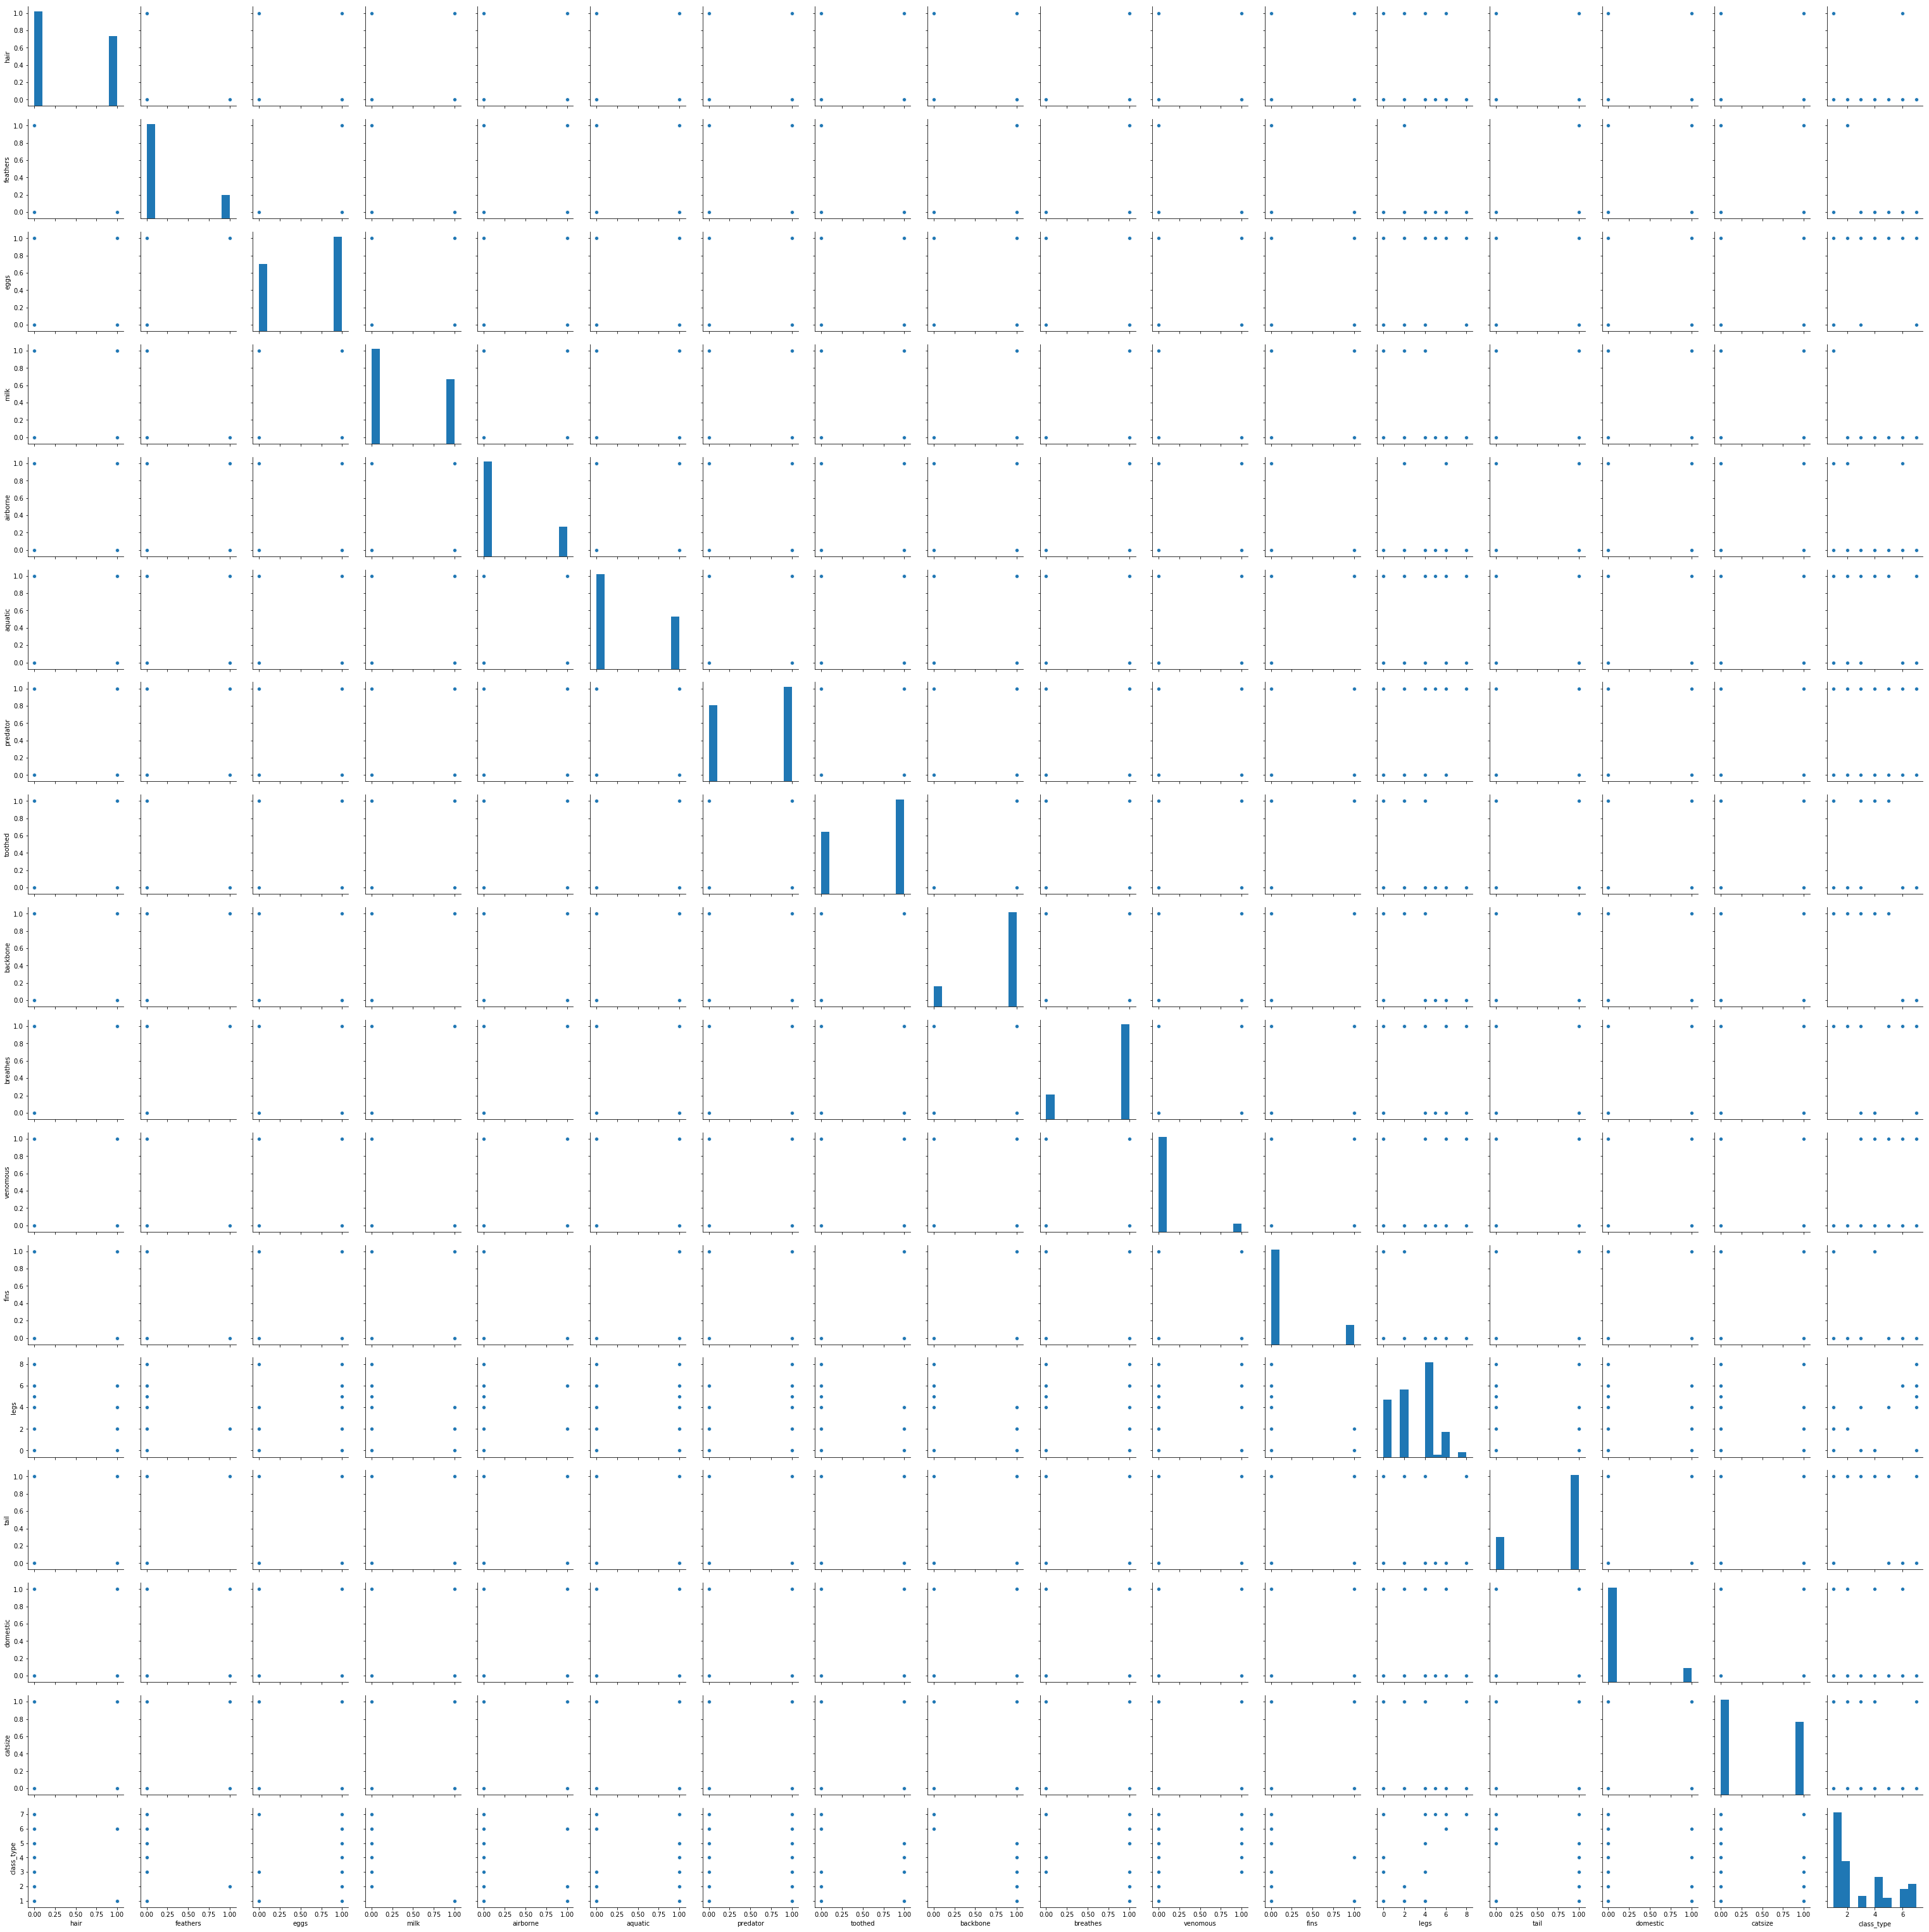

In [49]:
sns.pairplot(zoo)

### Decision Tree

In [69]:
X = zoo.select_dtypes(include=["int64"]).drop("class_type",1)
Y = zoo.class_type 

In [73]:
# Load decision tree model
from sklearn.tree import DecisionTreeRegressor

# Define model
model_dtree = DecisionTreeRegressor()

# Fit model
model_dtree.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [70]:
# Import model
from sklearn import tree

# Help display visualizations
from IPython.display import Image

# Initialize and train tree
regressor_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_depth=3,
    max_features=3
)

# Render tree
regressor_tree.fit(X, Y)
#export_graphviz(regressor_tree, out_file='regressor_tree.dot',feature_names=X.columns,
#   class_names=Y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=3,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [71]:


# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X,Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=zoo.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

ValueError: Length of feature_names, 17 does not match number of features, 16

### Random Forests

In [74]:
# Load random forest model
from sklearn.ensemble import RandomForestRegressor

# Define model
model_rf = RandomForestRegressor()

# Fit model
model_rf.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Cross Validation

In [75]:
#cross validation

tree_score = cross_val_score(regressor_tree, X, Y, cv=5)
print('CV Score:\n', tree_score)
print('\n\nMean:', tree_score.mean(), '\n\nVariance:', tree_score.std()*2)

CV Score:
 [0.73400239 0.81720278 0.97940054 0.86204537 0.95461071]


Mean: 0.8694523576668004 

Variance: 0.179938041810844


In [78]:
forest_score = cross_val_score(model_rf, X, Y, cv=5)
print('CV Score:\n', forest_score)
print('\n\nMean:', forest_score.mean(), '\n\nVariance:', forest_score.std()*2)

CV Score:
 [0.9895     0.99755501 0.98277929 0.94500365 0.94502421]


Mean: 0.9719724314627506 

Variance: 0.04500661715271958


### Simplicity via Runtime

In [79]:
import time

#runtime of tree
start = time.time()

regressor_tree = tree.DecisionTreeRegressor(
    criterion = 'mse',
    max_depth = 3,
    max_features = 3
)

tree_Score = cross_val_score(regressor_tree, X, Y, cv=5)

end = time.time()
tree_time = end-start
print(tree_time)

0.012964725494384766


In [80]:

#runtime of forest
start = time.time()

regressor_forest = ensemble.RandomForestRegressor(
    max_depth = 3,
    max_features = 3
)

forest_score = cross_val_score(regressor_forest, X, Y, cv=5)

end = time.time()
forest_time = end-start
print(forest_time)

0.05684781074523926


In [81]:
print('Forest is', round(forest_time/tree_time, 2), 'times slower than the tree')

Forest is 4.38 times slower than the tree
